# CS559 - F20 Project #1

## Task Desciption
You are provided with an anonymized dataset containing numeric feature variables, the binary target column, and a string ID_code column.

The task is to predict the value of `target` column in the test set using either **Logistic Regression** and **SVM**. You are welcome to use **regularizaiton**. 

## File descriptions
- train.csv - the training set (202 columns)

- test.csv - the test set. The test set contains some rows which are not included in scoring.

## Rules
- The data does not have specific column names. Therefore, you will not know what data is about. 
- However, you still can do classicaition problem without clustering the training set. **No unsupervised learning techniques in this project**. 
- There are 202 columns. This means that the key of high accuracy comes from **EDA** and **feature enegineering**. 
- There are no rules on EDA and Feature Engineering. 
- On your model, make sure you can reduce the columns at the most of 25%. If we use all columns, we may have high computational cost and getting into bias-variance tradeoff and underfit vs. overfit situations. 
- The project is out of 100. 
    - 50 points will come from your EDA and any pre-processing work. 
    - 30 points will come from your model: Accuracy + overcoming any ML challenges. 
    - 10 points will come from in-class competition. 
        - Ranking the accuracy with less features. 
    - 10 points will come from a report describing your work flow and model evaluations.
        - must be submitted in different file (e.g., pdf, docx). 
        
## Recommand Before-Preprocessing
- You can split the set from the data distribution. 
- You can make multiple new data frames by randomly selecting columns. 
- You can do similar by rows. 

## Recommand Before-training model
- Make sure to delete features from supportive reasons. 

Proejct DUE: 10/23/2020 Friday 11:59 PM. 




In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re

In [33]:
df = pd.read_csv("train.csv")
df.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [34]:
##drop ID_code since it has no value
df.drop(labels="ID_code", axis =1, inplace=True)

In [39]:
df.dtypes


target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

In [35]:
df.shape

(200000, 201)

In [40]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


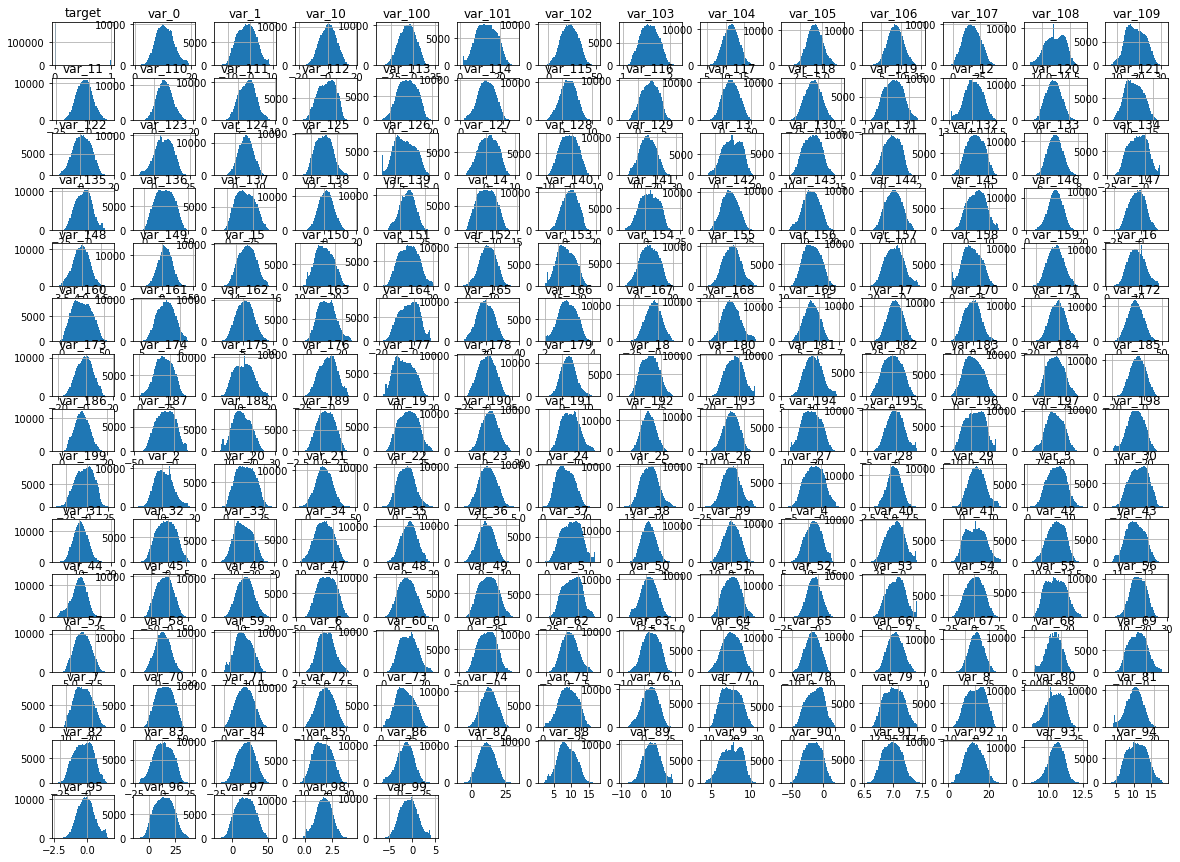

In [29]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
for col in df.columns:
    print(col)
    print(df[col].unique().astype(str))

target
['0' '1']
var_0
['8.9255' '11.5006' '8.6093' ... '7.4206' '16.201' '13.2152']
var_1
['-6.7863' '-4.1473' '-2.7457' ... '-5.8821' '-0.4956' '-8.6098']
var_2
['11.9081' '13.8588' '12.0805' ... '15.4684' '16.7052' '13.6104']
var_3
['5.093' '5.388999999999999' '7.8928' ... '3.6779' '3.9237' '3.5142']
var_4
['11.4607' '12.3622' '10.5825' ... '13.5497' '12.4612' '8.3096']
var_5
['-9.2834' '7.0433' '-9.0837' ... '11.6081' '-10.5628' '-5.4086']
var_6
['5.1187' '5.6208' '6.9427' ... '7.5961' '6.6964' '3.3806']
var_7
['18.6266' '16.5338' '14.6155' ... '9.9232' '12.9887' '15.1516']
var_8
['-4.92' '3.1468' '-4.9193' ... '-1.0373' '0.1202' '-0.4541']
var_9
['5.747000000000001' '8.0851' '5.9525' ... '5.8118' '6.1635' '9.9473']
var_10
['2.9252' '-0.4032' '-0.3249' ... '6.1414' '3.1223' '6.4829']
var_11
['3.1821' '8.0585' '-11.2648' ... '-11.8776' '0.7086' '-8.7049']
var_12
['14.0137' '14.0239' '14.1929' ... '14.5049' '14.4529' '14.4719']
var_13
['0.5745' '8.4135' '7.3124' ... '1.615' '5.2982' 

In [75]:
#building a baseline
#creating a copy
X= df.copy()

targ = df.target
X = X.drop('target', axis=1)

X=X.fillna(0)

for c in df.columns[df.dtypes == 'object']:
    x[c] = x[c].factorize()[0]

    
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,targ)

/Users/isabellalfairman/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

features_list = sorted(feats,key=feats.get,reverse=True)
print('Most important features: %s' %features_list)

Most important features: ['var_81', 'var_12', 'var_139', 'var_26', 'var_109', 'var_53', 'var_174', 'var_110', 'var_166', 'var_22', 'var_146', 'var_80', 'var_6', 'var_198', 'var_76', 'var_99', 'var_179', 'var_78', 'var_2', 'var_13', 'var_165', 'var_40', 'var_190', 'var_133', 'var_94', 'var_21', 'var_148', 'var_164', 'var_154', 'var_1', 'var_34', 'var_44', 'var_33', 'var_191', 'var_122', 'var_0', 'var_92', 'var_18', 'var_108', 'var_75', 'var_184', 'var_115', 'var_121', 'var_130', 'var_170', 'var_177', 'var_86', 'var_91', 'var_123', 'var_56', 'var_43', 'var_147', 'var_9', 'var_149', 'var_169', 'var_172', 'var_192', 'var_155', 'var_107', 'var_32', 'var_89', 'var_51', 'var_188', 'var_93', 'var_127', 'var_118', 'var_162', 'var_132', 'var_125', 'var_163', 'var_95', 'var_5', 'var_35', 'var_150', 'var_119', 'var_83', 'var_28', 'var_67', 'var_186', 'var_131', 'var_48', 'var_145', 'var_111', 'var_197', 'var_195', 'var_135', 'var_87', 'var_134', 'var_141', 'var_114', 'var_167', 'var_106', 'var_137

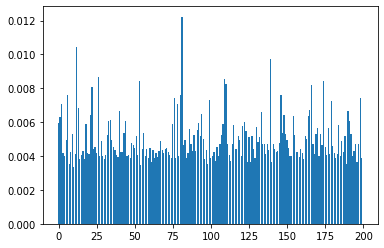

In [77]:
# plot feature importance
importance = rf.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [84]:
print('mean', df.var_81.mean())
print('std', df.var_81.std())

mean 14.719023858500014
std 2.299567114776461


In [85]:
#repeated values
df.var_81.value_counts().head(15)

15.6210    14
15.8789    13
14.1672    13
15.0039    13
13.5828    13
15.9831    13
16.2902    13
14.2303    12
15.7141    12
15.0453    12
14.6781    12
15.7769    12
14.0392    12
14.0762    12
15.6586    12
Name: var_81, dtype: int64

In [87]:
var_81_unique = df.var_81.unique()
var81_sort=np.sort(var_81_unique)

np.diff(var81_sort)

array([0.0073, 0.4034, 0.0217, ..., 0.0702, 0.0596, 0.2024])

In [101]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s=s.fit_transform(X)



In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(s, targ)
y_pred = regressor.predict(s)